# Introduction to Regression with Statsmodels

### Visualizing Data and Fitting a Regression Line

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taiwan_real_estate = pd.read_csv('Data/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [8]:
taiwan_real_estate.corr(numeric_only=True, method='pearson')

,dist_to_mrt_m,n_convenience,price_twd_msq
dist_to_mrt_m,1.000000,-0.602519,-0.673613
n_convenience,-0.602519,1.000000,0.571005
price_twd_msq,-0.673613,0.571005,1.000000


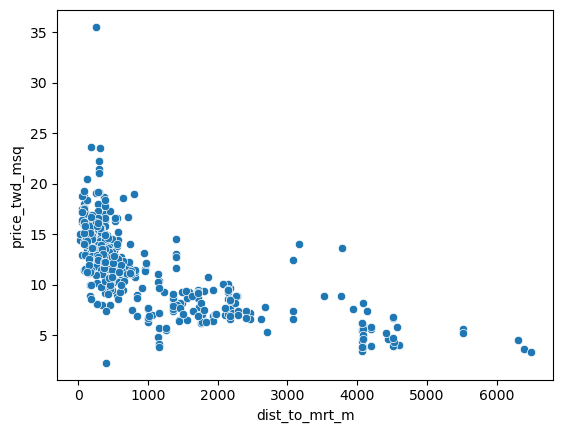

In [ ]:
sns.scatterplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

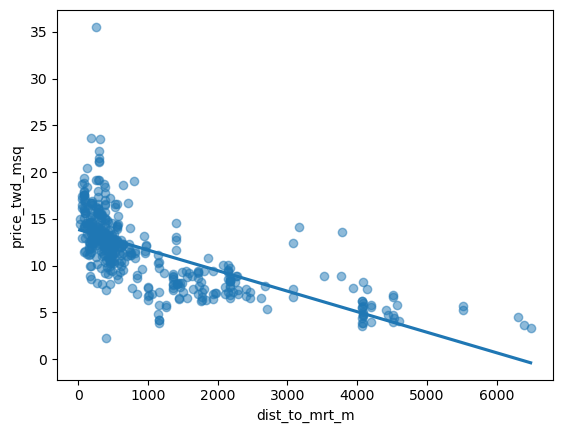

In [ ]:
# regplot() fits a regression line onto the plot
sns.regplot(
    x='dist_to_mrt_m',
    y='price_twd_msq',
    ci=None,
    data=taiwan_real_estate,
    scatter_kws={'alpha':0.5}   
)

plt.show()

### Fitting a Linear Regression 

In [ ]:
# Import the 'Ordinary Least Squares' (ols()) function from statsmodels 
# It is a mathematical technique for finding the best fit regression line
# by finding the minimum sum of squared residuals
from statsmodels.formula.api import ols

In [16]:
# ols() usually takes two arguments. The response variable is placed before the tilde (~)
# and the explanatory variable after it. Second parameter is the data

# Here, ols() returns a model named 'mrt_dist_vs_price'
mrt_dist_vs_price = ols('price_twd_msq ~ dist_to_mrt_m', data=taiwan_real_estate)

# Fitting the model
mrt_dist_vs_price = mrt_dist_vs_price.fit()

In [21]:
# Printing the model with parameters
# ols() has computed b_0 (intercept) 
# and b_1(slope named 'dist_to_mrt_m' which is the independent var.)

print(mrt_dist_vs_price.params)

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64


### Categorical Explanatory Variables    

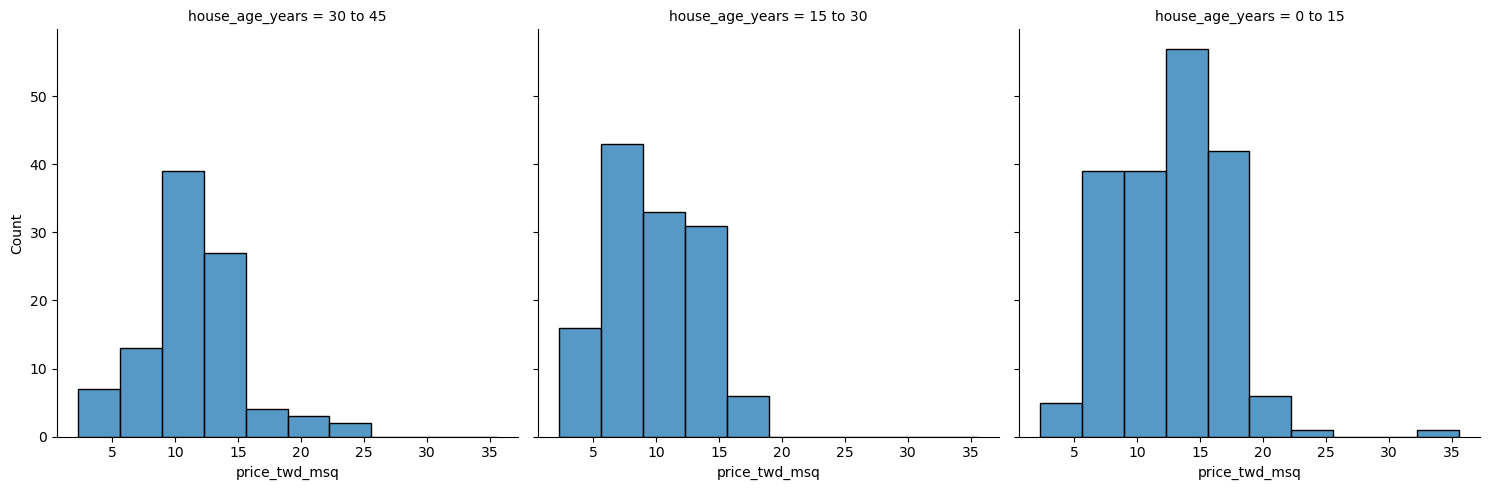

In [ ]:
# Sometimes, independent variables may be categorical such as the 'house_age_years' column

# Visualizing each house age category using sns.displot()
sns.displot(
    data=taiwan_real_estate,
    x='price_twd_msq',
    col='house_age_years',
    bins=10
)

plt.show()

In [27]:
# Finding the mean price for each house age category
taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [ ]:
mdl_price_vs_age = ols(
    'price_twd_msq ~ house_age_years',
    data=taiwan_real_estate
).fit()

# Notice that the '0 to 15' category becomes the reference group
# This method of parameterization is useful for multivariable linear
# regression. For simple linear regression, it is more ideal to have 
# each categorical independent variable their own regression line.

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [ ]:
# Adding a '+ 0' in the formula omits the intercept/constant.
# This forces each group through the origin (which is now the reference group)
mdl_price_vs_age0 = ols(
    'price_twd_msq ~ house_age_years + 0',
    data=taiwan_real_estate
).fit()

print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
